In [1]:
# ***********************************************************
# SCAN ON EP CONCENTRATION: DIRECT and MPR DIAGNOSTIC
# ***********************************************************

In [2]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [21]:
run main_NLED31213

<IPython.core.display.Javascript object>


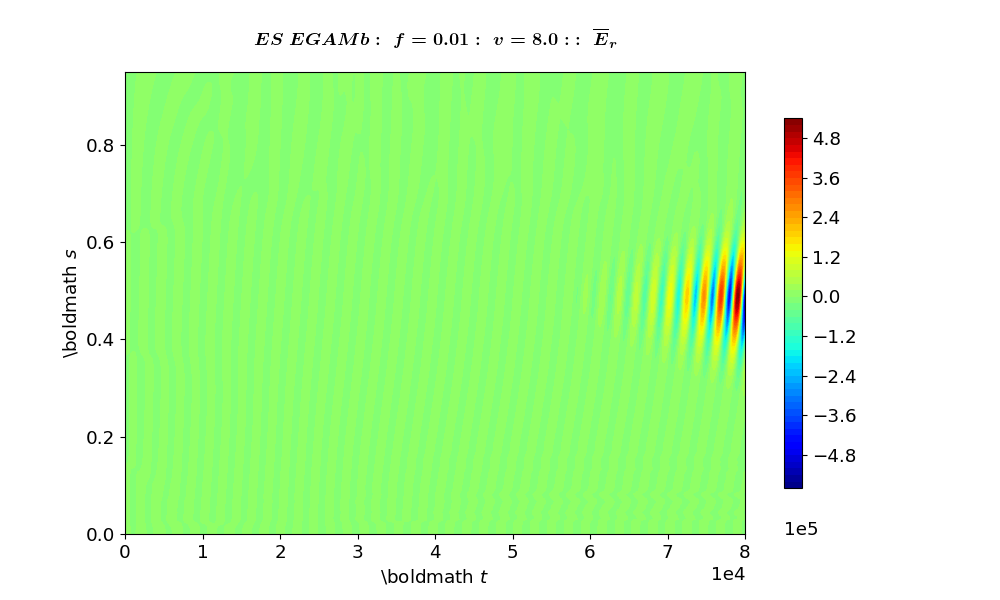

<IPython.core.display.Javascript object>


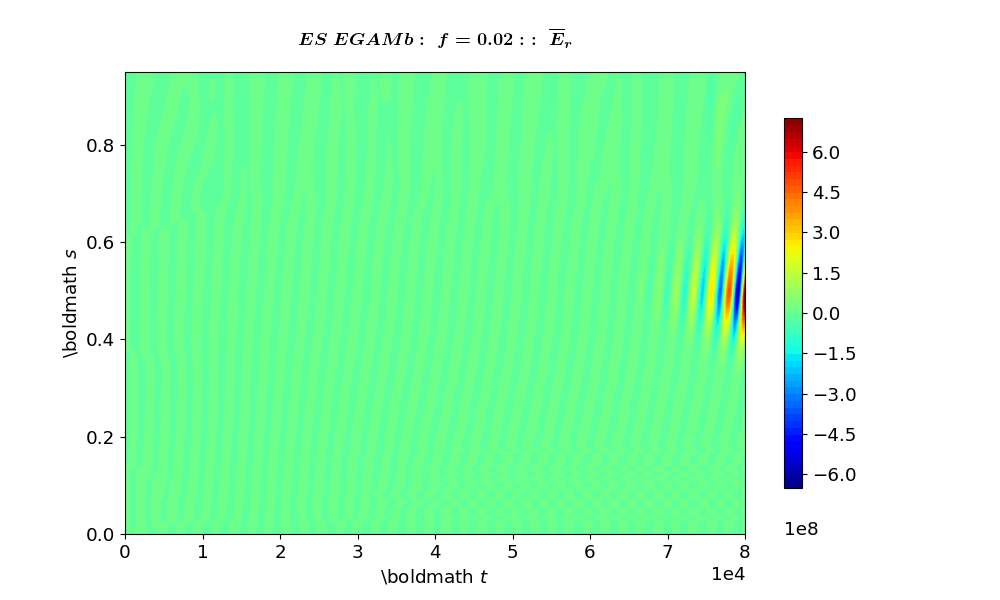

<IPython.core.display.Javascript object>


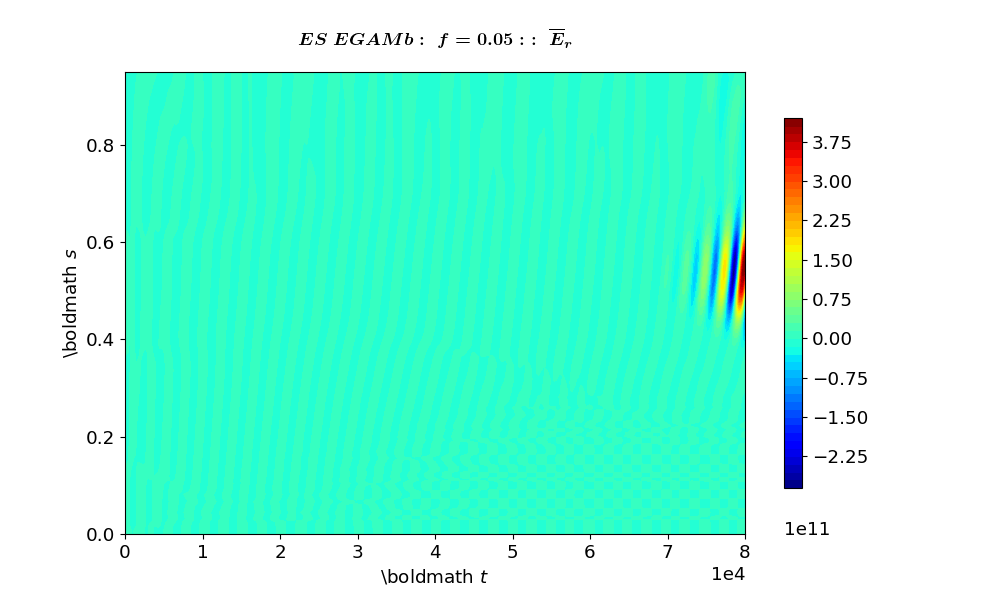

<IPython.core.display.Javascript object>


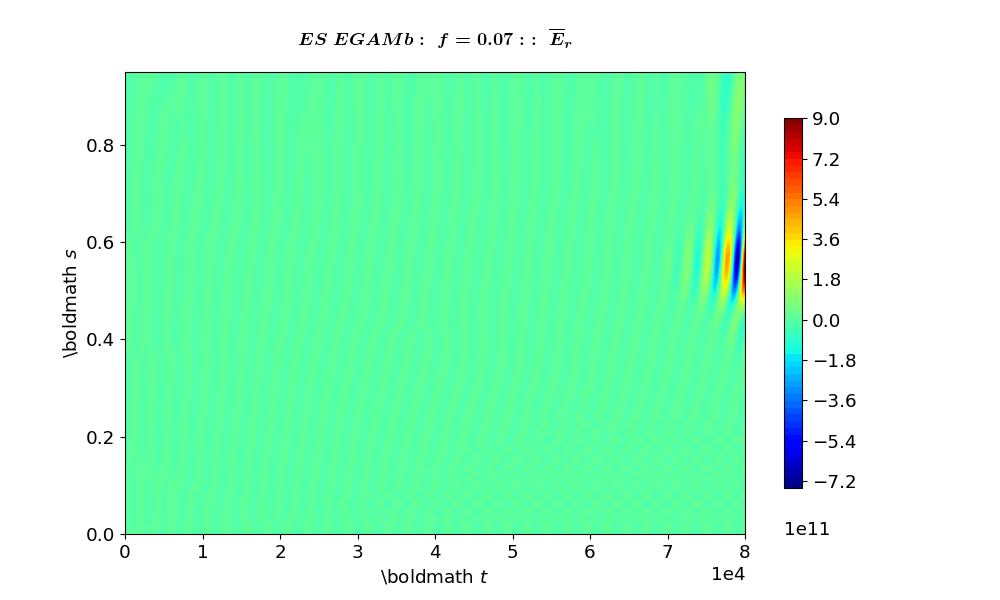

<IPython.core.display.Javascript object>


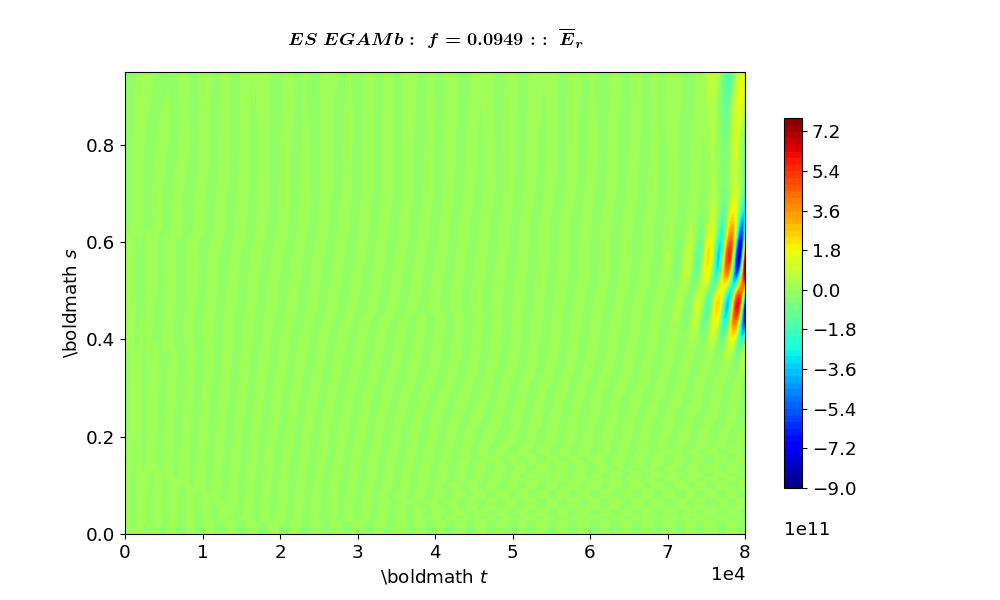

In [22]:
# *******************
# *** PLOT: (t,s) ***
# *******************
reload()

npr = 5

oo_ts = {
    'ovars': [
        ['zonal', 'erbar'], 
    ] * npr,
    'avrs': [
        ['ts']
    ] * npr,
#     'dds': [b025_f0002, b025_f0004, b025_f0006, b025_f0008, b025_f001_mpr],
    'dds': [b025_f001_mpr, b025_f002, b025_f005, b025_f007, b025_f009],
#     'var_legs1': ['f = 0.01'],
#     'var_legs2': ['f = 0.05'],
#     'var_legs3': ['f = 0.0949'],
}

oo_ts.update({
#      't_start': 6e4,
#     't_end': 6.3e4,
#      's_start': 0.3, 's_end': 0.7,
})

common.plot_vars_2d(oo_ts)

<IPython.core.display.Javascript object>


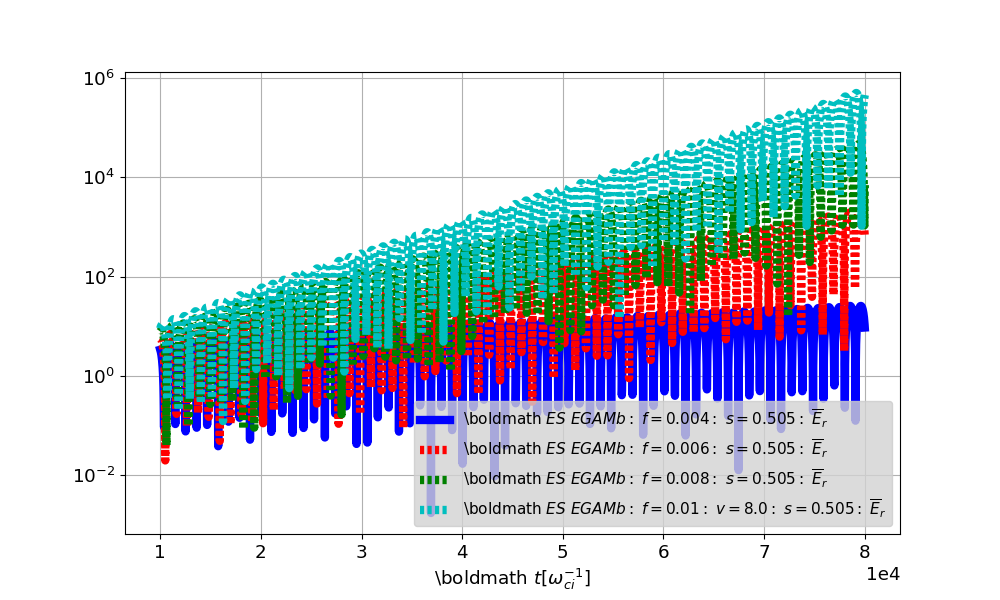

In [6]:
# ***********************
# *** PLOT: (t) at s1 ***
# ***********************
reload()

npr = 4
s1 = 0.50

oo_t_s1 = {
    'ovars': [
        ['zonal', 'erbar'],
    ]*npr,
    'avrs': [
        ['ts', 'point-s', [s1]],
    ]*npr,
    'dds': [b025_f0004, b025_f0006, b025_f0008, b025_f001_mpr],
    'flag_semilogy': True,
    'stys': ['-', ':', ':', ':'],
    'labx': 't[\omega_{ci}^{-1}]',
#     'var_legs1': ['f = 0.05'],
#     'var_legs2': ['dt=10'],
#     'var_legs3': ['dt=20'],
    'x_start': 1e4, 
#     'x_end': 4.3e4,
}
common.plot_vars_1d(oo_t_s1)

<IPython.core.display.Javascript object>


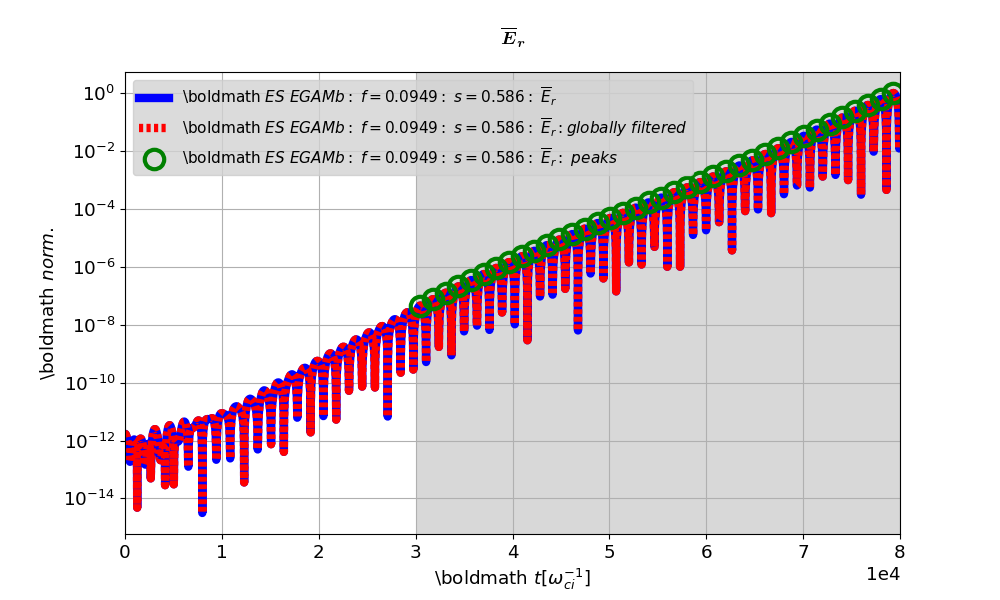

<IPython.core.display.Javascript object>


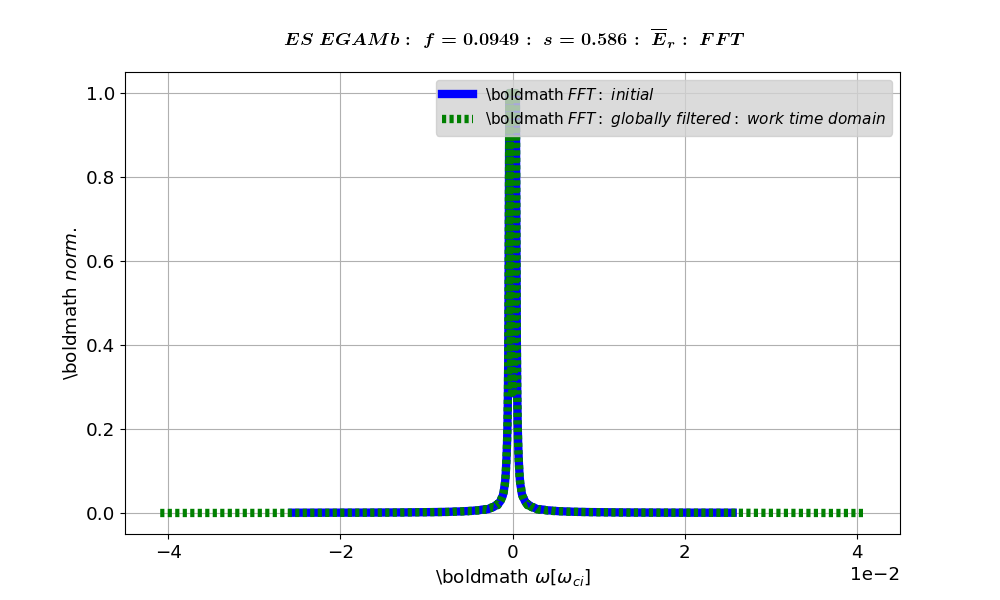

<IPython.core.display.Javascript object>


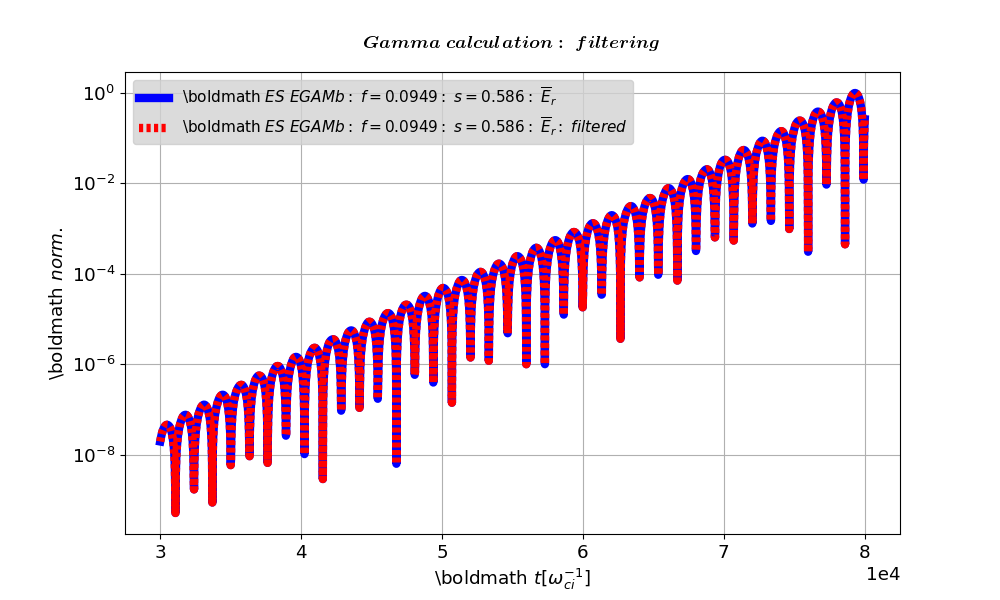

<IPython.core.display.Javascript object>


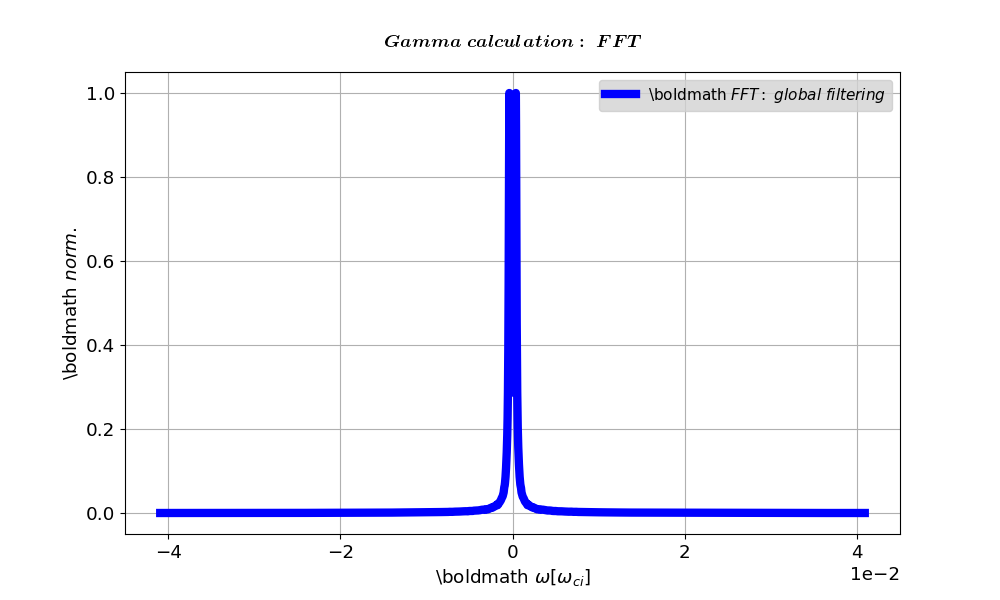

<IPython.core.display.Javascript object>


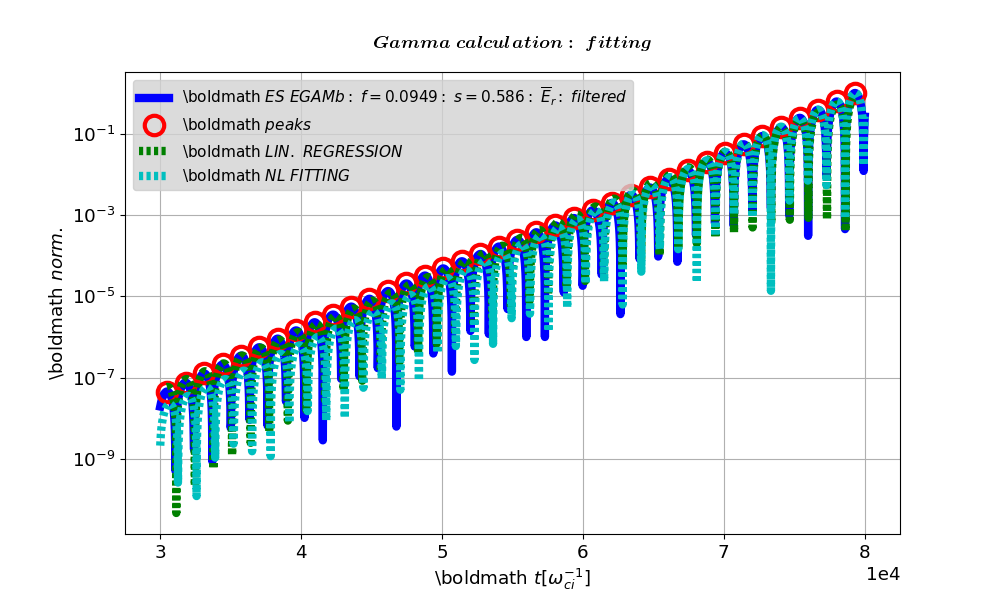

<IPython.core.display.Javascript object>


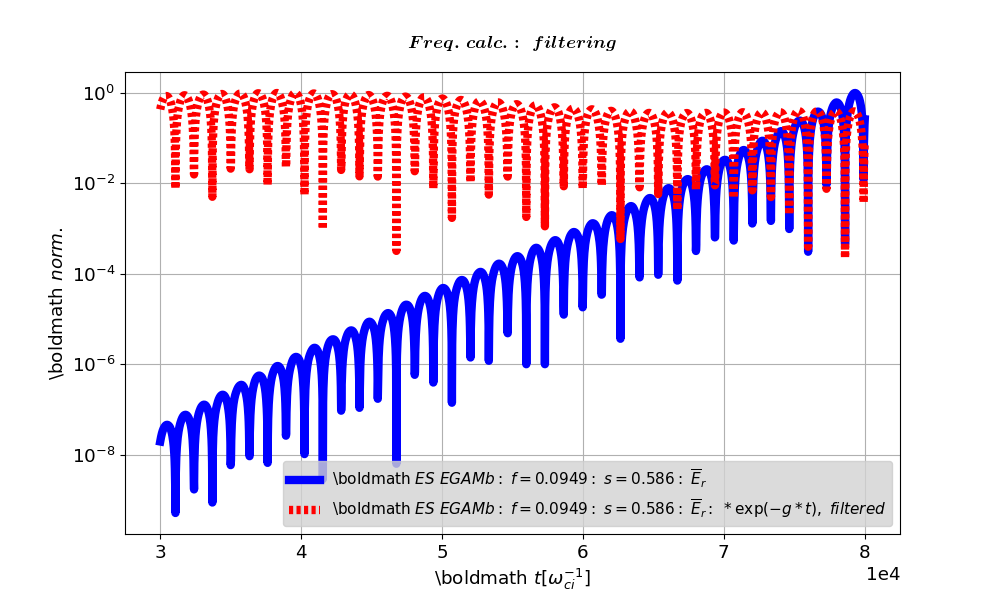

<IPython.core.display.Javascript object>


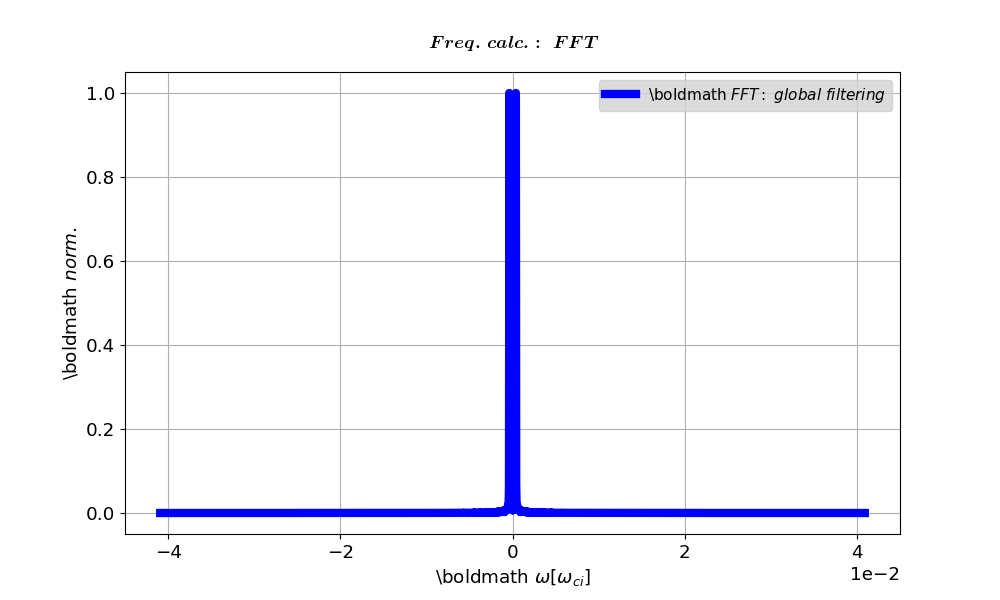

<IPython.core.display.Javascript object>


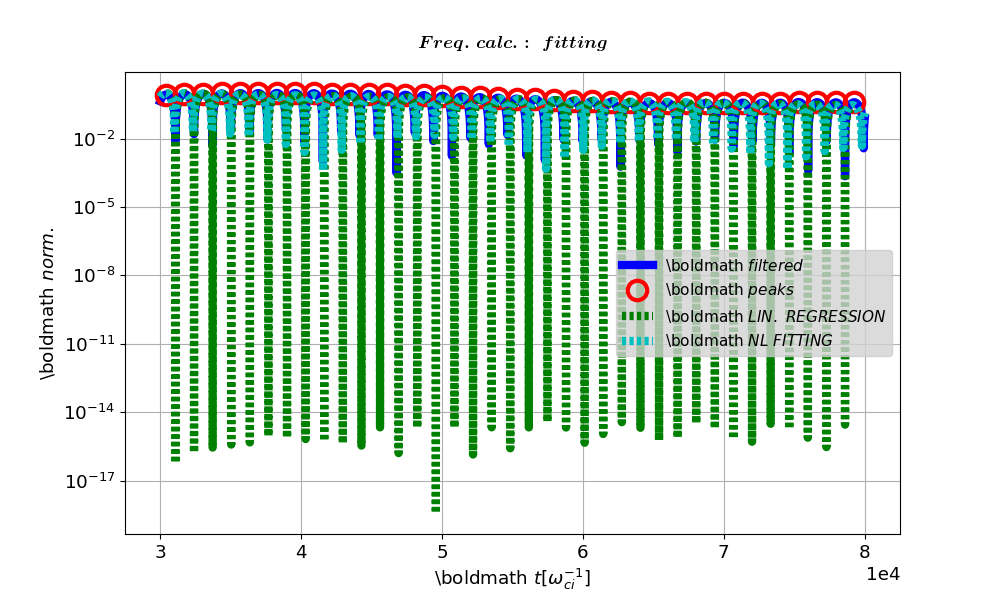

--- NAIVE CALCULATION ---
- GAMMA: ESTIMATION -
prel. w[wci] = 2.381e-03
g[wci] = 3.366e-04 +- 3.412e-06
- GAMMA: NL FITTING -
prel. w[wci] = 2.389e-03 +- 3.997e-07
g[wci] = 3.622e-04 +- 4.501e-07
- FREQUENCY: ESTIMATION -
w[wci] = 2.380e-03
(g_real - g_num)[wci] = -2.564e-05 +- 3.412e-06
- FREQUENCY: NL FITTING -
w[wci] = 2.383e-03 +- 6.723e-07
(g_real - g_num)[wci] = -2.513e-05 +- 6.648e-07
All chosen time intervals are unique.


<IPython.core.display.Javascript object>


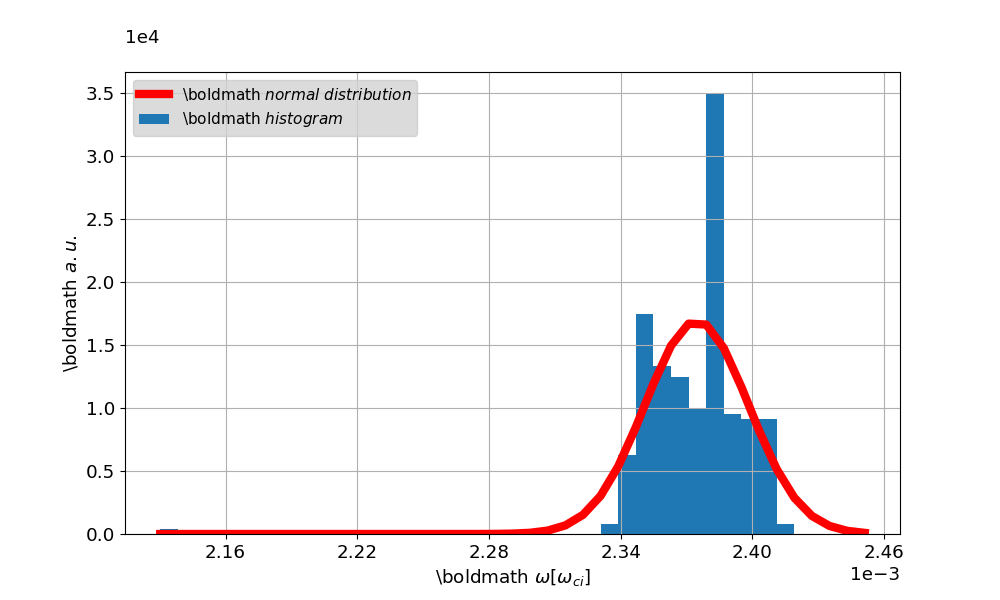

<IPython.core.display.Javascript object>


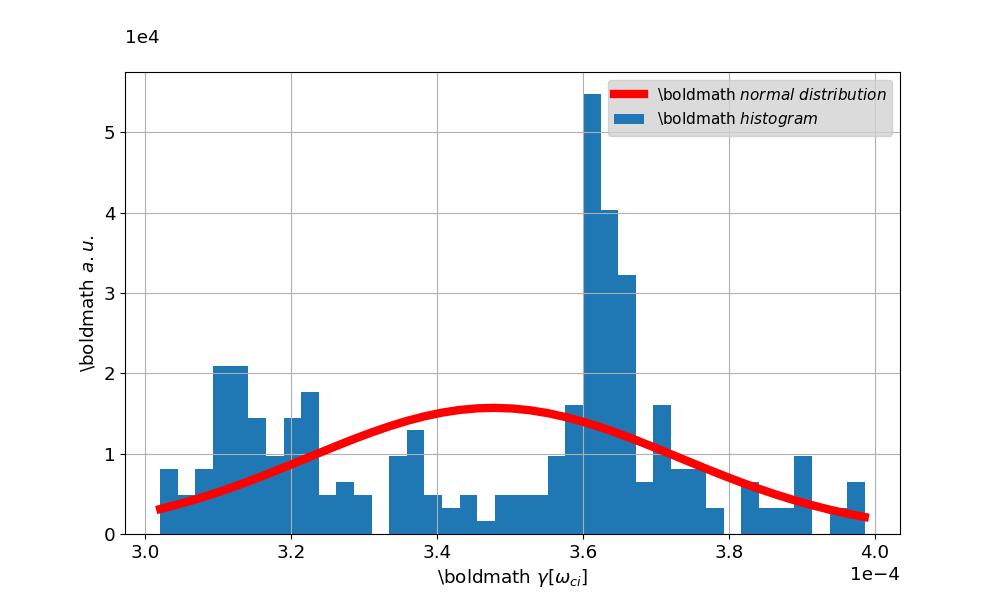

--- STATISTICS ---
number of frequency samples = 300
number of rate samples = 257
w[wci] = 2.375e-03+-4.630e-05
g[wci] = 3.477e-04+-4.980e-05


{'naive': {'w_est': 0.002379994434537722,
  'g_est': 0.00033659271785968183,
  'w_adv': 0.0023829084478400814,
  'g_adv': 0.0003622309210307218},
 'stat': {'w': 0.002374656682521133,
  'err_w': 4.630151139485276e-05,
  'g': 0.0003477420537362257,
  'err_g': 4.979802139683911e-05}}

In [27]:
# ***********************************************************
# *** DIRECT METHOD: FIND FRQUENCY and GAMMA (s1) ***
# ***********************************************************
reload()

s1 = 0.50
dd_current, s1 = dict(b025_f009), 0.58
# dd_current, s1 = dict(b025_f007), 0.57
# dd_current, s1 = dict(b025_f005), 0.54
# dd_current, s1 = dict(b025_f002), 0.50
# dd_current, s1 = dict(b025_f001_mpr), 0.50
# dd_current, s1 = dict(b025_f0008), 0.50
# dd_current, s1 = dict(b025_f0006), 0.50
# dd_current, s1 = dict(b025_f0004), 0.50

tmin, tmax = 3e4, 8.0e4
filt_global = None
filt_freq = None
min_n_peaks, threshold_w, threshold_g = 4, 0.1, 0.1
n_samples = 300    

oo_var = {
    'ovars': [['zonal', 'erbar']],
    'avrs': [['ts', 'point-s', [s1]]],
    'dds': [dd_current],
#     'sel_legs1': 'woPr',
}

oo_wg = {
    # BASIC
    't_work': [tmin, tmax], 
    'flag_two_stages': True,
#     'sel_norm': 'vt',
    # FILTERING
    'filt_global': filt_global, 
    'filt_freq': filt_freq,
    # STATISTICS
    'flag_stat':   True,
    'n_samples':   n_samples,
    'min_n_peaks': min_n_peaks,
    'threshold_w': threshold_w,
    'threshold_g': threshold_g,
}

oo_plot = {
#     't_plot': [0.15e4, 1.5e4],
    'flag_norm': True,
    'flag_semilogy': True
}

common.calc_wg(oo_var, oo_wg, oo_plot)

<IPython.core.display.Javascript object>


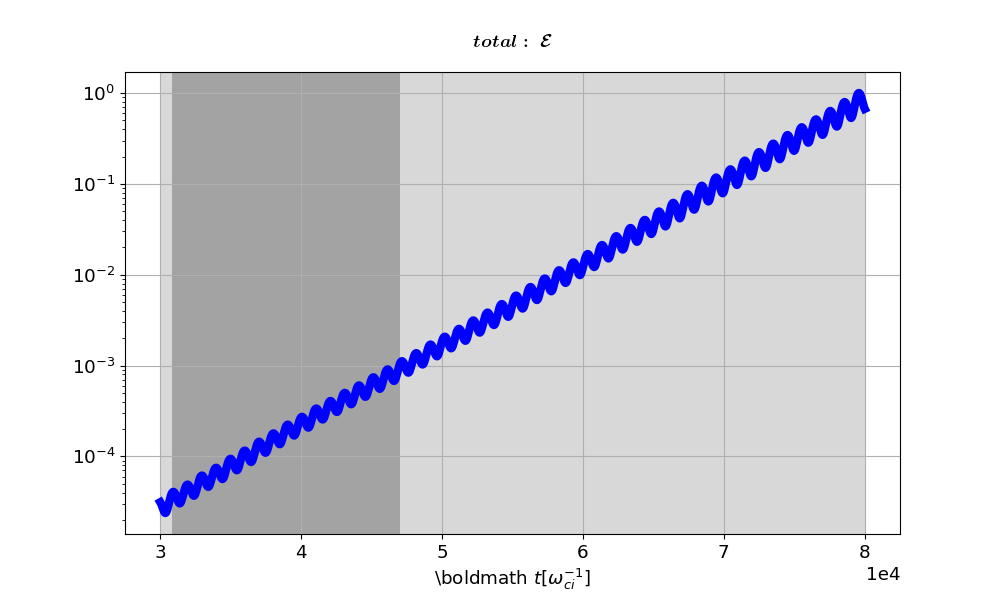

<IPython.core.display.Javascript object>


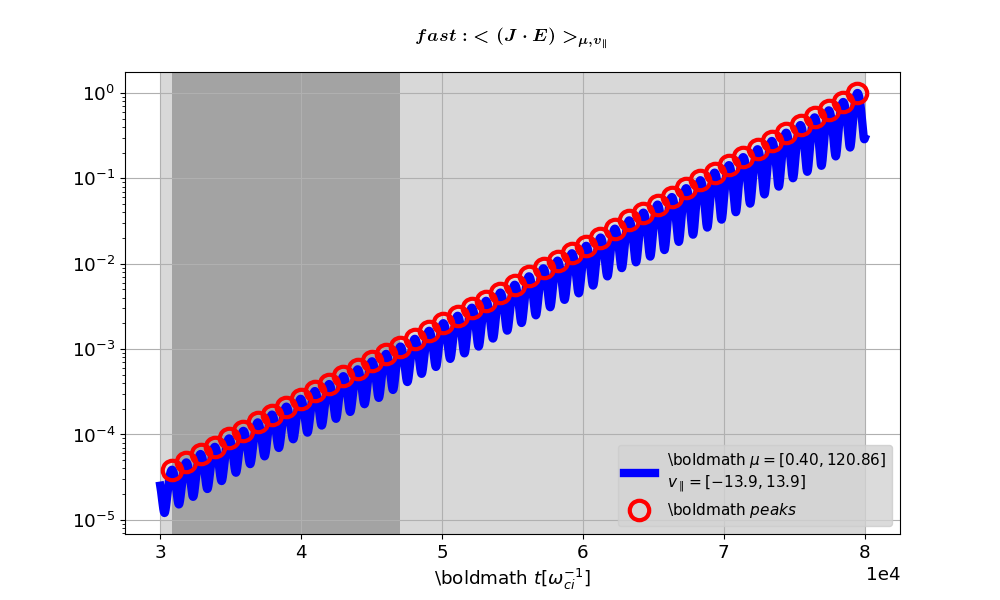

All chosen time intervals are unique.


<IPython.core.display.Javascript object>


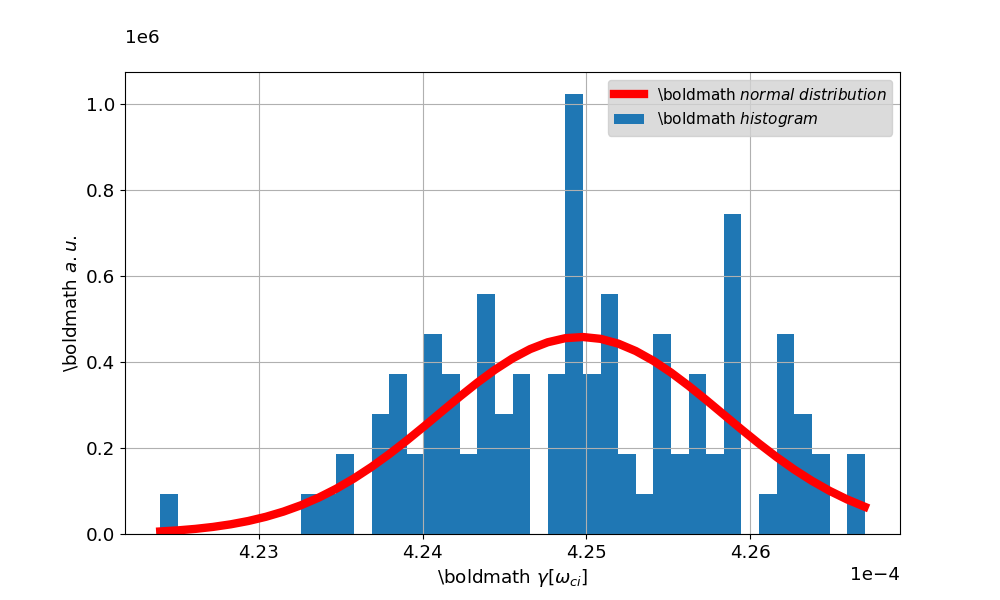

velocity domain: \mu = [0.40, 120.86]$
$ v_{\parallel} = [-13.9, 13.9]
fast: Initial: g[wci] = 4.260e-04
fast: Statistics: g[wci] = 4.250e-04+-1.707e-06



In [43]:
# ********************
# *** ES EGAM: MPR ***
# ********************
reload()

# species_name, flag_inv_peaks = 'total', True
# species_name, flag_inv_peaks = 'deuterium', False
species_name, flag_inv_peaks = 'fast', True

dd_current, gam_w = dict(b025_f001_v70), 2.652e-03
dd_current, gam_w = dict(b025_f001_v75), 2.763e-03
dd_current, gam_w = dict(b025_f001_v78), 2.830e-03
dd_current, gam_w = dict(b025_f001_v82), 2.918e-03
dd_current, gam_w = dict(b025_f001_v85), 2.988e-03
dd_current, gam_w = dict(b025_f001_v90), 3.102e-03

tmin, tmax = 3.0e4, 8.0e4
n_samples, min_gam_n_periods = 100, 3
filt_je = None
filt_ef = None
filt_er = None

oo_vars = {
    'sel_species': species_name,
}

oo_wg = {
    't_work': [tmin, tmax],
    'flag_naive_t_peaks': True,
    'naive_n_periods': 8,
    'flag_inv_peaks': flag_inv_peaks,
    'gam-w': gam_w,  # normalization is always [wc]
    # calculate confidence intervals
    'flag_stat': True,
    'n_samples': n_samples,
    'min_gam_n_periods': min_gam_n_periods,
}

oo_plot = {
    't_plot': oo_wg['t_work'],
    'flag_norm': True,
    'flag_semilogy': True,
}

common.MPR_gamma(dd_current, oo_vars, oo_wg, oo_plot)

In [11]:
from ip_projects import NLED_scans

<IPython.core.display.Javascript object>


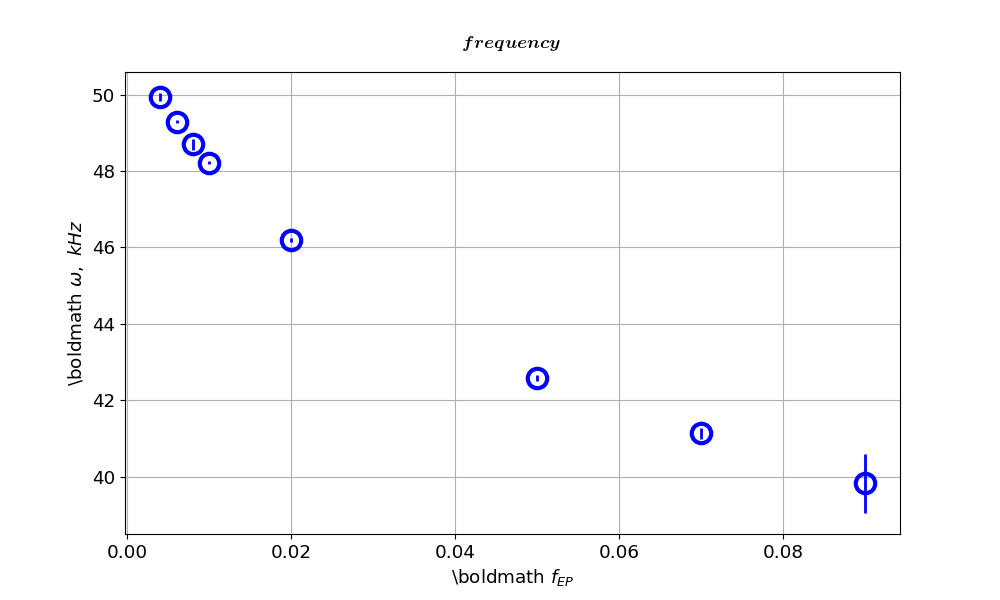

<IPython.core.display.Javascript object>


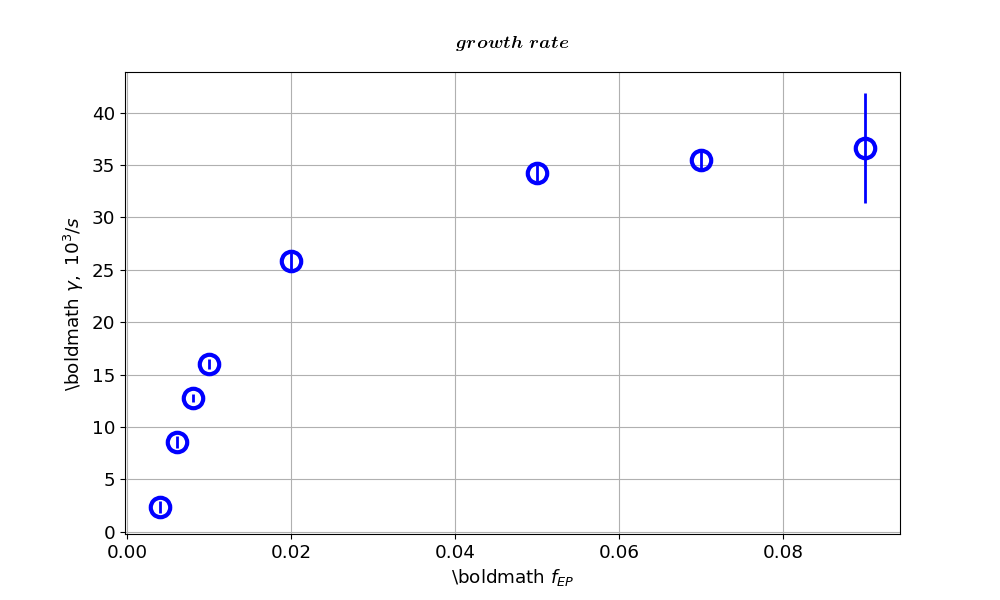

In [30]:
# **********************
# *** SCAN ON F_PART ***
# **********************
mix.reload_module(NLED_scans)
NLED_scans.es_egam_fpart_scan_rho025({'sel_norm': 'khz', 'dd': b025_f001_v90})